In [1]:
import pandas as pd
import numpy as np

## Reading csv

In [2]:
africa = pd.read_csv("../resources/og/Africa_aggregated_data_up_to-2025-10-18.csv")
asia_pacific = pd.read_csv("../resources/og/Asia-Pacific_aggregated_data_up_to-2025-10-11_0.csv")
europe_central_asia = pd.read_csv("../resources/og/Europe-Central-Asia_aggregated_data_up_to-2025-10-11.csv")
latin_america_caribbean = pd.read_csv("../resources/og/Latin-America-the-Caribbean_aggregated_data_up_to-2025-10-18.csv")
middle_east = pd.read_csv("../resources/og/Middle-East_aggregated_data_up_to-2025-10-18.csv")
us_canada = pd.read_csv("../resources/og/US-and-Canada_aggregated_data_up_to-2025-10-11_0.csv")

## Cleaning

In [3]:
def preprocess_region(df):
    
    df_cleaned = df.dropna(subset=["POPULATION_EXPOSURE"])
    df_cleaned = df_cleaned.drop(columns=[ "REGION","ID", "CENTROID_LATITUDE", "CENTROID_LONGITUDE"])

    countries_to_keep = ["Russia", "Ukraine", "Israel", "Palestine", "Mexico"]

    df_cleaned = df_cleaned[df_cleaned["COUNTRY"].isin(countries_to_keep)]
    
    
    return df_cleaned

ukraine_russia_cleaned = preprocess_region(europe_central_asia)
mexico_cleaned = preprocess_region(latin_america_caribbean)
israel_palestine_cleaned = preprocess_region(middle_east)

ukraine_russia_cleaned.to_csv("../resources/ukraine_russia_cleaned.csv", index=False)
mexico_cleaned.to_csv("../resources/mexico_cleaned.csv", index=False)
israel_palestine_cleaned .to_csv("../resources/israel_palestine_cleaned.csv", index=False)


## Code to preprocess the data for the specific visualizations

In [4]:
sub_event_to_delete = [
    "Protest with intervention", "Peaceful protest", "Agreement",
    "Strategic developments", "Arrests", "Change to group/activity",
    "Disrupted weapons use", "Headquarters or base established",
    "Non-violent transfer of territory", "Other"
]

In [5]:
def prepare_combined_boxplot(df, sub_event_to_delete, output_path):

    df = df[~df["SUB_EVENT_TYPE"].isin(sub_event_to_delete)]
    df = df.groupby(["WEEK", "COUNTRY"], as_index=False)["POPULATION_EXPOSURE"].sum()
    df = df[["COUNTRY", "POPULATION_EXPOSURE"]]
    df.to_csv(output_path, index=False)

    return df

ukraine_russia = prepare_combined_boxplot(ukraine_russia_cleaned, sub_event_to_delete, "../resources/plots/sectiontwo/ukraine_russia.csv")
mexico = prepare_combined_boxplot(mexico_cleaned, sub_event_to_delete, "../resources/plots/sectiontwo/mexico.csv")
israel_palestine = prepare_combined_boxplot(israel_palestine_cleaned, sub_event_to_delete, "../resources/plots/sectiontwo/israel_palestine.csv")

In [6]:
numeric_cols = ["POPULATION_EXPOSURE"]

# Summary statistics
display(ukraine_russia[numeric_cols].describe())
display(mexico[numeric_cols].describe())
display(israel_palestine[numeric_cols].describe())

,POPULATION_EXPOSURE
count,5.880000e+02
mean,2.315943e+06
std,2.587347e+06
min,4.059000e+03
25%,2.878232e+05
50%,8.720460e+05
75%,4.569387e+06
max,1.303894e+07


,POPULATION_EXPOSURE
count,3.040000e+02
mean,8.690024e+06
std,1.561991e+06
min,2.616779e+06
25%,7.701322e+06
50%,8.594174e+06
75%,9.503968e+06
max,1.392734e+07


,POPULATION_EXPOSURE
count,5.980000e+02
mean,9.050890e+05
std,1.131141e+06
min,1.120000e+02
25%,1.347112e+05
50%,4.435320e+05
75%,1.035493e+06
max,5.127321e+06


###  Ridgline Plot: 
una riga per conflitto, onde per fatalities e per population exposure

In [7]:
def prepare_combined_ridglineplot(df, sub_event_to_delete, output_path):

    df = df[~df["SUB_EVENT_TYPE"].isin(sub_event_to_delete)]
    df = df.groupby(["WEEK", "COUNTRY"], as_index=False)[["POPULATION_EXPOSURE", "FATALITIES"]].sum()
    df = df[["COUNTRY", "POPULATION_EXPOSURE", "FATALITIES"]]
    df.to_csv(output_path, index=False)

    return df

ukraine_russia_cleaned= pd.read_csv("../resources/ukraine_russia_cleaned.csv")
mexico_cleaned= pd.read_csv("../resources/mexico_cleaned.csv")
israel_palestine_cleaned = pd.read_csv("../resources/israel_palestine_cleaned.csv")

ridglineplot_ukraine_russia= prepare_combined_ridglineplot(ukraine_russia_cleaned, sub_event_to_delete, "../resources/plots/sectiontwo/ridglineplot_ukraine_russia.csv")
ridglineplot_mexico = prepare_combined_ridglineplot(mexico_cleaned, sub_event_to_delete, "../resources/plots/sectiontwo/ridglineplot_mexico.csv")
ridglineplot_israel_palestine = prepare_combined_ridglineplot(israel_palestine_cleaned, sub_event_to_delete, "../resources/plots/sectiontwo/ridglineplot_israel_palestine.csv")

   COUNTRY  POPULATION_EXPOSURE  FATALITIES
0   Russia             124391.0           0
1  Ukraine             210632.0           0
2  Ukraine             520348.0           0
3  Ukraine             484152.0           3
4   Russia            1430230.0          82


<Figure size 1200x800 with 0 Axes>

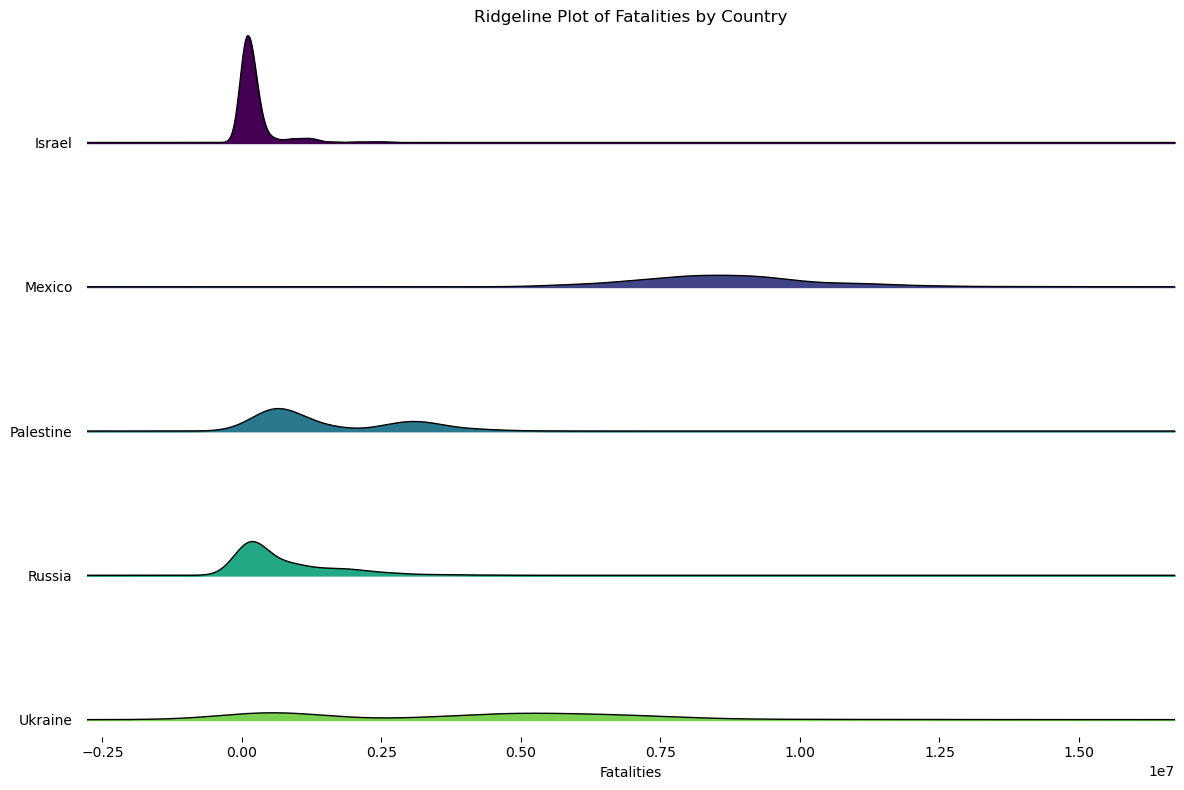

In [ ]:
# Install dependencies if you haven't already
# !pip install pandas matplotlib joypy

import matplotlib.pyplot as plt
from joypy import joyplot

# === Load your data ===
idglineplot_ukraine_russia = pd.read_csv("../resources/plots/sectiontwo/ridglineplot_ukraine_russia.csv")
ridglineplot_mexico = pd.read_csv("../resources/plots/sectiontwo/ridglineplot_mexico.csv")
ridglineplot_israel_palestine = pd.read_csv("../resources/plots/sectiontwo/ridglineplot_israel_palestine.csv")
df = pd.concat(
    [ridglineplot_ukraine_russia, ridglineplot_mexico, ridglineplot_israel_palestine],
    ignore_index=True
)

# === Check your columns ===
print(df.head())

# Example columns — adjust these if your CSV differs
# Assume:
#   - "WEEK" is the time variable (x-axis)
#   - "COUNTRY" is the category (each ridge)
#   - "FATALITIES" is the value to plot

# === Make the ridgeline plot ===
plt.figure(figsize=(12, 8))
joyplot(
    data=df,
    by="COUNTRY",               # grouping variable
    column="POPULATION_EXPOSURE",        # numeric value
    figsize=(12, 8),
    title="Ridgeline Plot of Fatalities by Country",
    colormap=plt.cm.viridis,    # choose a color map (optional)
    linewidth=1
)

plt.xlabel("Fatalities")
plt.ylabel("Country")
plt.tight_layout()
plt.show()